# Intro to Artificial Neural Network
In this notebook we would create our very first multi-layer perceptron (mlp) using the keras package. <br>
We shall then simulate an XOR problem and solve it using our own mlp

## Contents
[XOR Distribution](#XOR-Distribution) <br>
[Creating your MLP](#Creating-your-MLP) <br>
[Visualizing your neural network learning](#Visualizing-your-neural-network-learning) <br>

In [1]:
#importing the packages
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

%config InLineBackend.figure_format = 'svg' #magic code that gets svg rendered graphics. makes the plot nicer

Using TensorFlow backend.


## XOR Distribution
[Back to Contents](#Contents)

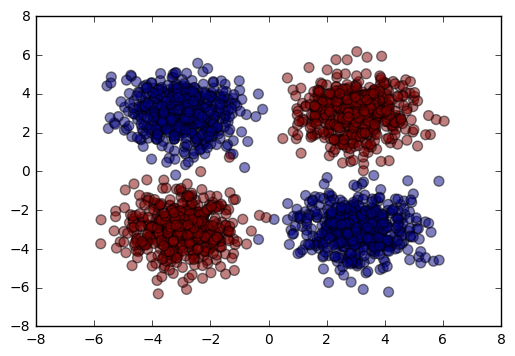

In [2]:
#Generating the XOR Distribution
Sample = 500
# Creating 4 gaussian clouds
X1 = np.random.randn(Sample,2) + np.array([3,-3])
X2 = np.random.randn(Sample,2) + np.array([-3,3])
X3 = np.random.randn(Sample,2) + np.array([3,3])
X4 = np.random.randn(Sample,2) + np.array([-3,-3])

X = np.vstack([X1,X2,X3,X4])

#For colouring
Y = np.array([0] * Sample *2 + [1] * Sample*2)

# plotting
plt.scatter(X[:,0],X[:,1], s = 50, c = Y, alpha = 0.5)
plt.show()

(400, 2)
(400,)


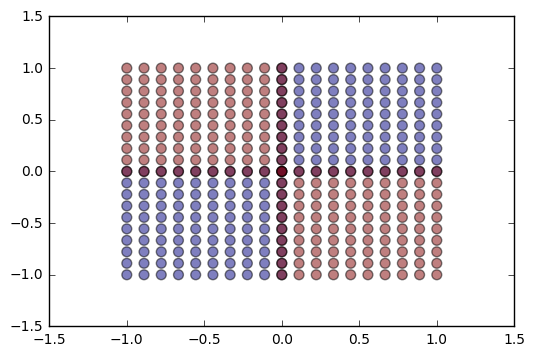

In [3]:
# Creating a more defined XOR distribution
def generate_XOR_distribution(max_x):
    '''
    function take in a max_x (int) and generate a XOR grid.
    returns X ndarray in the input space and Y, the class
    '''
    Sample = 10
    X1 = []
    X2 = []
    X3 = []
    X4 = []
    X1_temp = np.linspace(0,max_x,Sample)
    for i in X1_temp:
        for j in X1_temp:
            X1.append([i,j])
            X2.append([-i,-j])
            X3.append([-i,j])
            X4.append([i,-j])
    X1 = np.array(X1)
    X2 = np.array(X2)
    X3 = np.array(X3)
    X4 = np.array(X4)
    
    X = np.vstack([X1,X2,X3,X4])
    Y = np.array([0] * 2*Sample **2 + [1] *2* Sample**2)
    return X, Y
X, Y = generate_XOR_distribution(1)
print(X.shape)
print(Y.shape)
plt.scatter(X[:,0],X[:,1], s = 50, c = Y, alpha= 0.5)
plt.show()

## Creating your MLP
[Back to Contents](#Contents)

In [4]:
# Creating your mlp
n_input = 2
n_hidden = 3
n_output = 2

#Instantiating the model 
model = Sequential()

#Adding the layers
model.add(Dense(n_hidden, activation='sigmoid', input_dim=n_input))
model.add(Dense(n_output, activation='sigmoid'))

model.compile(loss=keras.losses.mean_squared_error, 
              optimizer=keras.optimizers.Adam(lr=0.01),
             metrics = ["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# One hot encoding
Y_out = keras.utils.to_categorical(Y,num_classes=2)

In [ ]:
# Training
print(X.shape)
print(Y_out.shape)

history = model.fit(X,Y_out,epochs = 500,batch_size = 128)

In [ ]:
input_space = []
temp = np.linspace(-1,1,100)
for i in temp:
    for j in temp:
        input_space.append([i,j])
input_space = np.array(input_space)
print(input_space.shape)
Y_hat = model.predict(input_space)
pred = Y_hat.argmax(axis=1)
print(pred.shape)
zero_space = input_space[pred == 0]
one_space = input_space[pred == 1]
plt.scatter(zero_space[:,0], zero_space[:,1],s = 50, alpha = 0.5)
plt.scatter(one_space[:,0], one_space[:,1],s = 50, alpha = 0.5)
plt.scatter(X[:,0],X[:,1], s = 50, c = Y, alpha = 0.5)
plt.show()

In [ ]:
from data_utils import accuracy_loss_plot
accuracy_loss_plot(history)

## Visualizing your neural network learning
[Back to Contents](#Contents)

<IPython.core.display.Javascript object>


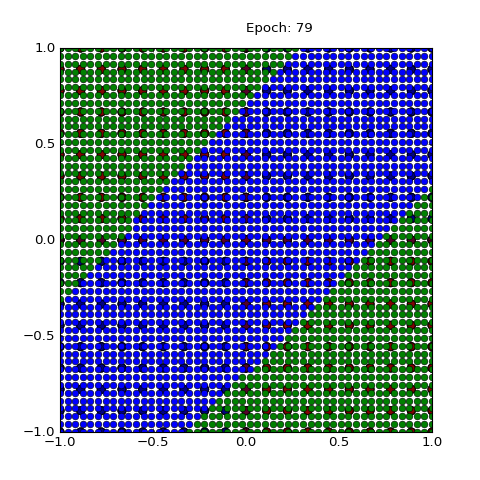

In [6]:
import matplotlib.animation as animation
%matplotlib notebook

fig, ax1 = plt.subplots(1, figsize = (6,6))
update_1, = ax1.plot([],[],'o', lw=0.5)
update_2, = ax1.plot([],[],'o', lw=0.5)
epoch_text = ax1.text(.5, 1.05, '', transform = ax1.transAxes, va='center')

def init():
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)
    ax1.scatter(X[:,0],X[:,1], s = 50, c = Y, alpha = 0.5)
    epoch_text.set_text('Epoch: 0')
    return update_1, update_2,

def animate(epoch):
    input_space = []
    temp = np.linspace(-1,1,50)

    for i in temp:
        for j in temp:
            input_space.append([i,j])
    input_space = np.array(input_space)

    model.fit(X,Y_out,epochs = 1,batch_size = 128, verbose = 2)
    Y_hat = model.predict(input_space)
    pred = Y_hat.argmax(axis=1)
    zero_space = input_space[pred == 0]
    one_space = input_space[pred == 1]
    update_1.set_data(zero_space[:,0], zero_space[:,1])
    update_2.set_data(one_space[:,0], one_space[:,1])
    ep = epoch
    epoch_text.set_text('Epoch: ' +  repr(ep))
    return update_1, update_2, epoch_text


ani = animation.FuncAnimation(fig, animate, frames = 300, init_func = init, interval = 100, blit = True) #interval is in millseconds
plt.show()